In [1]:
# TASK 1 - create Y
import pandas as pd

# load data (local files you downloaded)
data = pd.read_csv("dataset_part_2.csv")
print("data shape:", data.shape)
display(data.head())

# create Y as numpy array and keep a Series copy
Y = data['Class'].to_numpy()
Y_series = data['Class']

print("Y type:", type(Y), "shape:", Y.shape)
print("First 10 Y values:", Y[:10])


data shape: (90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Y type: <class 'numpy.ndarray'> shape: (90,)
First 10 Y values: [0 0 0 0 0 0 1 1 0 0]


TASK 2 — Standardize the Data in X

In [2]:
# TASK 2 - Standardize X

# Load X from local file
X = pd.read_csv("dataset_part_3.csv")
print("X shape:", X.shape)
display(X.head())

from sklearn import preprocessing

# Initialize scaler
transform = preprocessing.StandardScaler()

# Fit & transform X
X_scaled = transform.fit_transform(X)

# Convert back to DataFrame for readability
X = pd.DataFrame(X_scaled, columns=X.columns)

print("\nAfter Standardization:")
display(X.head())

print("\nMean of each column (should be close to 0):")
print(X.mean().round(4))

print("\nStd of each column (should be close to 1):")
print(X.std().round(4))


X shape: (90, 83)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



After Standardization:


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.97344,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091



Mean of each column (should be close to 0):
FlightNumber     0.0
PayloadMass     -0.0
Flights         -0.0
Block           -0.0
ReusedCount      0.0
                ... 
GridFins_True   -0.0
Reused_False     0.0
Reused_True     -0.0
Legs_False      -0.0
Legs_True        0.0
Length: 83, dtype: float64

Std of each column (should be close to 1):
FlightNumber     1.0056
PayloadMass      1.0056
Flights          1.0056
Block            1.0056
ReusedCount      1.0056
                  ...  
GridFins_True    1.0056
Reused_False     1.0056
Reused_True      1.0056
Legs_False       1.0056
Legs_True        1.0056
Length: 83, dtype: float64


TASK 3 — Train/Test Split

In [3]:
# TASK 3 - Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


TASK 4 — Logistic Regression with GridSearchCV

In [4]:
# TASK 4 - Logistic Regression with GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# hyperparameter grid (as per lab instructions)
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],        # only l2 allowed with lbfgs
    'solver': ['lbfgs']
}

lr = LogisticRegression(max_iter=10000)

# GridSearchCV
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
logreg_cv.fit(X_train, Y_train)

# Output best results
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Best cross-validation accuracy:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8464285714285713


TASK 5 — Evaluate Logistic Regression on Test Data & Plot Confusion Matrix

Logistic Regression TEST accuracy: 0.8333333333333334


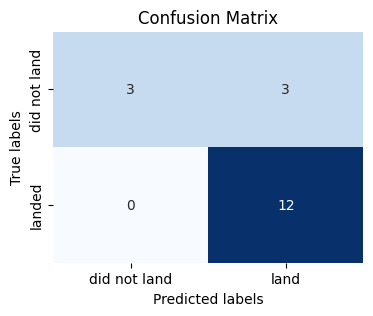


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [8]:
# TASK 5 - Evaluate Logistic Regression on TEST data

# Accuracy on test set
test_accuracy_lr = logreg_cv.score(X_test, Y_test)
print("Logistic Regression TEST accuracy:", test_accuracy_lr)

# Predictions
yhat_lr = logreg_cv.predict(X_test)

# Confusion matrix
plot_confusion_matrix(Y_test, yhat_lr)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(Y_test, yhat_lr))


In [7]:
# FIX: Define confusion matrix function again

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()


TASK 6 — Train SVM with GridSearchCV

In [9]:
# TASK 6 - SVM with GridSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Hyperparameter grid (as per lab instructions)
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()

svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Train the SVM model with hyperparameter tuning
svm_cv.fit(X_train, Y_train)

# Output best parameters & best CV accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best cross-validation accuracy: 0.8482142857142856


TASK 7 — Evaluate SVM on Test Data & Plot Confusion Matrix

SVM TEST accuracy: 0.8333333333333334


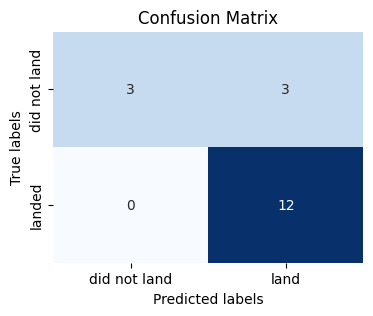


Classification Report (SVM):

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [10]:
# TASK 7 - Evaluate SVM on Test Data

# Compute test accuracy
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("SVM TEST accuracy:", test_accuracy_svm)

# Predictions
yhat_svm = svm_cv.predict(X_test)

# Confusion matrix
plot_confusion_matrix(Y_test, yhat_svm)

# Detailed classification report
from sklearn.metrics import classification_report
print("\nClassification Report (SVM):\n")
print(classification_report(Y_test, yhat_svm))


TASK 8 — Decision Tree with GridSearchCV

In [11]:
# TASK 8 - Decision Tree with GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],   # 2 to 18
    'max_features': ['sqrt', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier(random_state=2)

tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model
tree_cv.fit(X_train, Y_train)

# Results
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best cross-validation accuracy:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation accuracy: 0.8767857142857143


TASK 9 — Evaluate Decision Tree on Test Set + Confusion Matrix

Decision Tree TEST accuracy: 0.8333333333333334


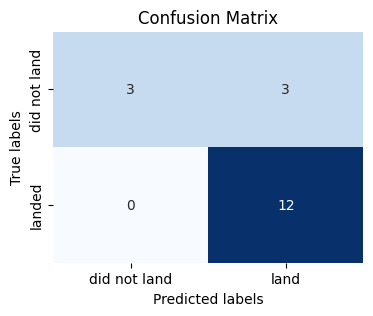


Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [12]:
# TASK 9 - Evaluate Decision Tree on Test Data

# Accuracy on test set
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Decision Tree TEST accuracy:", test_accuracy_tree)

# Predictions
yhat_tree = tree_cv.predict(X_test)

# Confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report (Decision Tree):\n")
print(classification_report(Y_test, yhat_tree))


TASK 10 — K-Nearest Neighbors (KNN) with GridSearchCV

In [13]:
# TASK 10 - KNN with GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for KNN
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]   # Manhattan or Euclidean
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
knn_cv.fit(X_train, Y_train)

# Best parameters & CV performance
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best cross-validation accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best cross-validation accuracy: 0.8482142857142858


TASK 11 — Evaluate KNN on Test Set + Confusion Matrix

KNN TEST accuracy: 0.8333333333333334


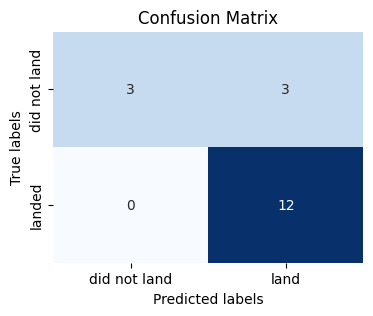


Classification Report (KNN):

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [14]:
# TASK 11 - Evaluate KNN on Test Data

# Test accuracy
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("KNN TEST accuracy:", test_accuracy_knn)

# Predictions
yhat_knn = knn_cv.predict(X_test)

# Confusion matrix
plot_confusion_matrix(Y_test, yhat_knn)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report (KNN):\n")
print(classification_report(Y_test, yhat_knn))


TASK 12 — Determine Which Model Performs Best

In [15]:
# TASK 12 - Compare model performance

results = {
    "Logistic Regression": test_accuracy_lr,
    "SVM": test_accuracy_svm,
    "Decision Tree": test_accuracy_tree,
    "KNN": test_accuracy_knn
}

import pandas as pd

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Test Accuracy"])
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
display(results_df)

best_model = results_df.iloc[0]
print(f"\nBest model overall: {best_model['Model']} with accuracy {best_model['Test Accuracy']:.4f}")


,Model,Test Accuracy
0,Logistic Regression,0.833333
1,SVM,0.833333
2,Decision Tree,0.833333
3,KNN,0.833333



Best model overall: Logistic Regression with accuracy 0.8333
